1) <span style="color:red"> Antes que nada, lee cuidadosamente estas instrucciones y las que aparecen en la hoja con la contraseña. </span>

2) Cambia el nombre de este archivo sustituyendo "nombre.apellido" por los tuyos, tal como aparecen en tu dirección de correo electrónico de la UAM.

3) Este archivo debe quedar en la carpeta "ENTREGA..." que está en el escritorio de tu cuenta de examen. Lo mejor es que esté en esa carpeta desde el comienzo del examen.

4) El examen resuelto debe quedar en este único archivo. No se puede usar un archivo para cada pregunta.

5) Recuerda que hay que deshabilitar el salvapantallas al comenzar el examen, tal como está indicado en la hoja con la contraseña. 




CALIFICACIÓN:


In [1]:
5+4

9

COMENTARIOS:

1)


## Ejercicio 1

Consideramos el siguiente 'juego': inicialmente hay $n$ jugadores  y en cada fase del juego cada jugador vivo elige **al azar** otro jugador vivo, distinto de sí mismo,  y lo mata.  El juego se repite hasta que queda un único jugador, *el elegido del destino*, o bien ninguno. En principio, es perfectamente posible que el juego se juegue una única vez.

1) Estima, con dos cifras decimales 'correctas',  la probabilidad de que, partiendo de  $n=100$ jugadores, haya un superviviente. Como se indicó en clase, entendemos que que son cifras decimales 'correctas' las que no cambian cuando se incrementa suficientemente el número $N$ de 'casos posibles'.

2) ¿Qué probabilidad tengo, si decido jugar con otros $99$ jugadores,  de ser yo el *elegido del destino*? Modifica el programa del apartado anterior para estimar la probabilidad y explica el resultado obtenido.

3) Ahora queremos estudiar la duración del juego. Para eso debemos  calcular *promedios* de la duración. Define una función *promedio(n,N)* que calcule el promedio y la desviación estándar de la duración con $n$ jugadores iniciales y $N$ repeticiones del juego. Evalúa *promedio(100,10^5)* y comenta los resultados obtenidos.

4) Finalmente, estudia la variación de los promedios al variar $n$ entre $10$ y $200$ saltando de $10$ en $10$. Realiza un gráfico de los resultados y analiza la dependencia funcional (el promedio como función de $n$). En este cuarto apartado probablemente tendrás que **elegir con más cuidado un $N$** (el número de repeticiones del juego utilizadas para calcular cada promedio) **adecuado**  dadas las capacidades bastante limitadas de la máquina. 

In [23]:
def find_pos(L, C):
    for j in xsrange(0, len(L)):
            if(L[j]==C):
                return j

Primero programamos una función que simule el juego asesino

In [63]:
def juego_sadico(N):
    Jugadores = list(Zmod(N)) #Los jugadores se identifican con numeros
    while(len(Jugadores)>1): #Se juegan mientras queden vivos
        Homicidios=[0]*len(Jugadores) #Cada uno elige otro a quien matar
        for j in xsrange(len(Jugadores)):
            a =randint(0, len(Jugadores)-1)
            while(a==j): #No puede matarse a sí mismo
                a = randint(0, len(Jugadores)-1)
            Homicidios[j]= a
        for item in Homicidios:
            x = find_pos(Jugadores, item)
            if(x == None):
                continue
            del(Jugadores[x])
    return len(Jugadores)
            
            
        

In [68]:
print juego_sadico(5)

0


Esta función es muy lenta (usa muchos bucles) así que intentaremos optimizarla para poder hallar fácilmente N=100

In [79]:
def elemento_aleatorio(A):
    B = list(A)
    n = len(B)-1
    return B[randint(0, n)]


In [283]:
def juego_rapido(N):
    Jugadores = list(Zmod(N))
    while(len(Jugadores)>1):
        Homicidios = []
        for jugador in Jugadores:
            m = elemento_aleatorio(Jugadores);
            while(m == jugador):
                m = elemento_aleatorio(Jugadores)
            
            Homicidios.append(m)
        for muerto in Homicidios:
            if(muerto in Jugadores):
                del(Jugadores[find_pos(Jugadores, muerto)])
    return len(Jugadores)
        

In [284]:
print juego_rapido(100)

0


1) Creamos la función que calcula la probabilidad iterando

In [285]:
def prob_elegido(N, digs):
    prob = 100
    count = 0
    k = 0
    while(1):
        if(juego_rapido(N)==1):
            count += 1
        k += 1
        prob2 = count/k
        if(abs(prob-prob2)<=10**(-digs-1) and prob !=0 and prob!=1):
            return (prob.N(digits=3), prob2.n(digits=3))
        prob = prob2

In [287]:
print prob_elegido(100, 2)[1]

0.473


Para estimarlo mejor hacemos la media de varias iteraciones de esto

In [288]:
def prob_media_elegido(N, digs, num):
    media = 0
    for i in xsrange(num):
        media += prob_elegido(N, digs)[1]
    return media/num

In [289]:
%%time
estimacion = prob_media_elegido(100, 2, 10)
print estimacion

0.509
CPU times: user 12 s, sys: 76 ms, total: 12.1 s
Wall time: 11.9 s


La probabilidad parece ser casi 1/2

2) Veamos ahora la prob de que un jugador concreto (tomemos el 0) sea el elegido

In [298]:
def juego_rapido2(N):
    Jugadores = list(Zmod(N))
    while(len(Jugadores)>1):
        Homicidios = []
        for jugador in Jugadores:
            m = elemento_aleatorio(Jugadores);
            while(m == jugador):
                m = elemento_aleatorio(Jugadores)
            
            Homicidios.append(m)
        for muerto in Homicidios:
            if(muerto in Jugadores):
                del(Jugadores[find_pos(Jugadores, muerto)])
    return Jugadores

In [299]:
def prob_yo_elegido(N, digs):
    prob = 100
    count = 0
    k = 0
    yo = randint(0, N-1)
    while(1):
        x = juego_rapido2(N)
        if(len(x)== 1):
            if(x[0] == yo):
                count += 1
        k += 1
        prob2 = count/k
        if(abs(prob-prob2)<=10**(-digs-1) and prob !=0 and prob!=1):
            return (prob.N(digits=3), prob2.n(digits=3))
        prob = prob2

In [300]:
def prob_media_yo_elegido(N, digs, num):
    media = 0
    for i in xsrange(num):
        media += prob_yo_elegido(N, digs)[1]
    return media/num

In [301]:
print prob_yo_elegido(100, 2)[1]

0.00240


In [304]:
print prob_media_yo_elegido(100, 2, 10)

0.00849


In [297]:
print 0.5/100

0.00500000000000000


Parece que la probabilidad de que el jugador elegido sea el 0 (y por tanto la de que sea uno concreto) vale 0.041. debería de corresponderse con la probabilidad de que el juego acabe con un elegido y ese elegido sea yo(regla del producto).

3) Hagamos la función que devolverá ambos resultados

In [305]:
def juego_rapido3(N):
    Jugadores = list(Zmod(N))
    k = 0
    while(len(Jugadores)>1):
        Homicidios = []
        for jugador in Jugadores:
            m = elemento_aleatorio(Jugadores);
            while(m == jugador):
                m = elemento_aleatorio(Jugadores)
            
            Homicidios.append(m)
        for muerto in Homicidios:
            if(muerto in Jugadores):
                del(Jugadores[find_pos(Jugadores, muerto)])
        k += 1
    return k

In [310]:
def promedio(n, N):
    L = []
    for i in xsrange(N):
        L.append(juego_rapido3(n))
    return ((sum(L)/N.N(), sage.stats.basic_stats.std(L).N()))
    

In [329]:
print promedio(100, 10000)

(4.43620000000000, 0.513766440705852)


Comentario sobre resultados

In [325]:
def variar_promedios():
    L = []
    for i in xsrange(1, 20):
        L.append((i,promedio(10*i, 1000)[0]))
    return L

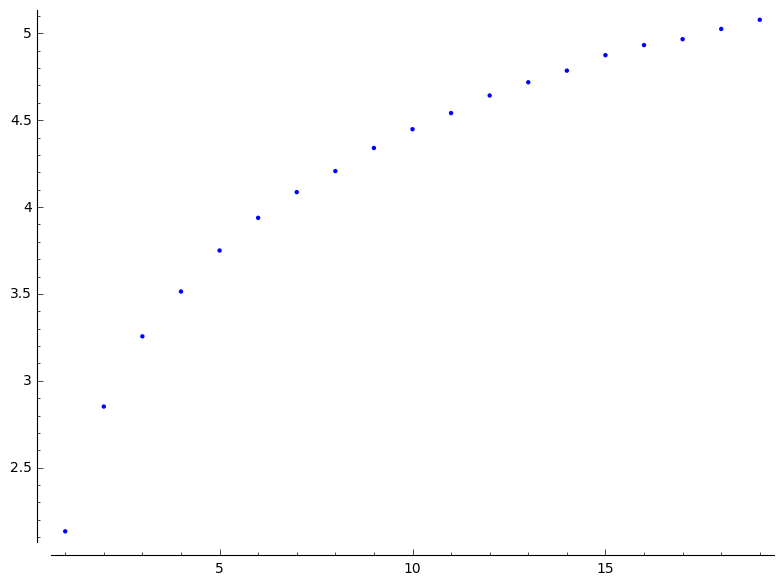

In [326]:
List = variar_promedios()
points(List)

La dependencia parece ser claramente una correlación logarítmica

## Ejercicio 2

Hemos visto que es posible estimar el área de un disco unidad *lanzando dardos al cuadrado unidad y contando los que caen dentro del disco*. El mismo procedimiento permite, en principio,  estimar el volumen de la hiperesfera $\mathbb{B}_n$  de radio $1$ en $\mathbb{R}^n$ (i.e. el conjunto de puntos de coordenadas $(x_1,x_2,\dots,x_n)\in \mathbb{R}^n$ tales que $x_1^2+x_2^2+\dots+x_n^2\le 1$), pero los volúmenes que vamos obteniendo al incrementar $n$ son cada vez más pequeños y bastante pronto obtenemos cero como respuesta. 

Ésto se debe a que, cuando $n$ es grande, muy pocos dardos caen dentro de la hiperesfera debido a que ocupa muy poco volumen con respecto al volumen, $2^n$,  del hipercubo unidad $[-1,1]^n$. En este ejercicio vemos una manera distinta de *lanzar dardos*, que nos va a asegurar que suficientes caen dentro de la hiperesfera. Denotemos por $V(n)$ el volumen de $\mathbb{B}_n$, que es lo que  queremos calcular. 

### Descripción del método

1) El *truco básico* consiste en considerar la hiperesfera de dimensión $n$  dentro del hipercilindro $\mathbb{C}_n:=\mathbb{B}_{n-1}\times [-1,1]$, en lugar de dentro del hipercubo $[-1,1]^n$.  El volumen del hipercilindro es, gracias al teorema de Fubini del cálculo integral, igual al volumen de $\mathbb{B}_{n-1}$ multiplicado por dos. 

2) En segundo lugar  observamos que para  obtener puntos aleatorios en el hipercilindro $\mathbb{C}_n$ basta generar puntos aleatorios $(x_1,x_2,\dots,x_{n-1})\in \mathbb{B}_{n-1}$ en la hiperesfera de dimensión $n-1$ y para cada uno producir un real aleatorio $x_n$ en el intervalo $[-1,1]$. 

3) Para que esto funcione debemos encontrar una **manera eficiente** de generar puntos aleatorios en la hiperesfera $\mathbb{B}_{n-1}$,  y el método que vamos a usar se llama de  *cadena de Markov* (una especie de *paseo aleatorio generalizado*):

A) El primer punto de la cadena $\mathbf{x}_0$ es, por ejemplo,  el origen de coordenadas.
    
B) Para cada punto $\mathbf{x}_t=(x_1,x_2,\dots,x_{n-1})\in \mathbb{B}_{n-1}$  obtenemos un nuevo punto $\mathbf{x}_{t+1}$ eligiendo una coordenada al azar, supongamos que hemos obtenido $x_i$,  y un real aleatorio $\Delta$ en el  intervalo $[-\delta,\delta]$. Entonces, cambiamos $x_i$ por $x_i+\Delta$ en $\mathbf{x}$ y si todavía estamos dentro de la hiperesfera ese es el nuevo punto $\mathbf{x}_{t+1}$ en la cadena. Si al hacer el cambio nos vamos fuera de la hiperesfera dejamos $\mathbf{x}_{t+1}:=\mathbf{x}_{t}$. 

C) La cadena $\{\mathbf{x}_0,\mathbf{x}_1,\dots,\mathbf{x}_t,\dots,\mathbf{x}_N\}$ es entonces un conjunto de $N+1$ puntos, todos en la hiperesfera $\mathbb{B}_{n-1}$, y se puede demostrar que, para $N$ suficientemente grande,  están uniformemente distribuidos en la hiperesfera. 

4) Después de estos preparativos podemos ya plantear el cálculo del volumen  $V(n)$ de la hiperesfera $\mathbb{B}_n$: 

Generamos un número muy grande $N$ de puntos en la hiperesfera de dimensión $n-1$, usando el apartado 3),  y para cada uno de ellos vamos calculando un punto en el hipercilindro, como en el apartado 2). Si el punto obtenido en el hipercilindro cae dentro de la hiperesfera  de dimensión $n$, $\mathbb{B}_n$,  incrementamos un contador, al que por ejemplo hemos llamado *dentro*. 

La fracción $dentro/N$, calculada después de haber generado $N$ puntos del hipercilindro,   es aproximadamente igual al cociente de volúmenes $V(n)/(2V(n-1))$ (volumen de la hiperesfera dividido por volumen del hipercilindro). 

Entonces, podemos reducir el cálculo  de $V(n)$ al de $V(n-1)$, el de $V(n-1)$ al de $V(n-2)$, etc., hasta llegar al volumen de la hiperesfera en dimensión $1$ que es igual a dos. 

### Ejercicios

2.1) Define las funciones necesarias para implementar esta forma, *Monte Carlo con cadenas de Markov*,  de calcular $V(n).$

2.2) El volumen exacto de una hiperesfera se puede calcular mediante integrales, y se obtiene una fórmula que se indica en la celda siguiente:


In [2]:
def Vol_exacto(dim):
    return (pi**(dim/2.0)/gamma(dim/2.0+1.0)).n()

In [4]:
print Vol_exacto(1);print Vol_exacto(2); print Vol_exacto(3); print Vol_exacto(100)

2.00000000000000
3.14159265358979
4.18879020478639
2.36820210188283e-40


¿Para qué queremos estimar esos mismos volúmenes mediante Monte Carlo? Los resultados exactos sirven como control de las estimaciones, y,  en particular,  permiten ajustar de forma óptima los parámetros $N$ y $\delta$. 

El parámetro $N$ debe ser suficientemente grande para obtener una precisión aceptable, pero no tan grande que tengamos que esperar una eternidad por el resultado, y el parámetro $\delta$, un real que podemos esperar que esté entre cero y uno,  no puede ser muy pequeño,  porque entonces todos los puntos de la cadena están muy próximos entre sí y no rellenan bien la hiperesfera, ni muy grande porque entonces la cadena repite muchas veces sus valores. 

 Queremos elegir los parámetros, $N$ y $\delta$,  para calcular,  mediante Monte Carlo,  el volumen de la hiperesfera de dimensión $50$  de forma que al menos sea correcta la primera cifra decimal no nula (por supuesto, cuantas más cifras correctas obtengamos mejor). Tomamos $N=10^5$ y elegimos un $\delta$ óptimo, dentro del intervalo $(0,1)$,   mediante experimentos adecuados. 




In [3]:
def dentro(L):
    suma = 0
    for item in L:
        suma += item**2
    if(sqrt(suma)<=1):
        return true
    return false

In [4]:
def copy(L):
    R = []
    for item in L:
        R.append(item)
    return R

In [5]:
def puntos_Markov(dim, N, delta):
    L = [0]*dim
    Res = [L]
    for k in xsrange(1, N+1):
        H = copy(Res[k-1])
        R = copy(Res[k-1])
        aleat = -delta + 2*delta*random() #numero aleatorio en [-delta, delta]
        elid = randint(0, dim-1)
        element = R[elid]
        element += aleat
        R[elid]=element
        if(dentro(R)):
            Res.append(R)
        else:
            Res.append(H)
    return Res
    

In [6]:
print puntos_Markov(3, 10, 0.5)

[[0, 0, 0], [0, 0, -0.486668848826150], [-0.377103220863474, 0, -0.486668848826150], [-0.377103220863474, -0.418611487718869, -0.486668848826150], [-0.211158984150431, -0.418611487718869, -0.486668848826150], [-0.211158984150431, -0.206958530294391, -0.486668848826150], [-0.211158984150431, -0.206958530294391, -0.0544597262684525], [-0.211158984150431, -0.206958530294391, 0.296066530162648], [-0.211158984150431, -0.206958530294391, -0.106544548433307], [-0.211158984150431, -0.468261426428534, -0.106544548433307], [-0.211158984150431, -0.468261426428534, 0.239297444246078]]


In [7]:
L = []
R = puntos_Markov(3, 10, 0.5) #Probamos que todos los puntos generados están dentro de la esfera
for p in R:
    L.append(dentro(p))
print all(L)

True


In [19]:
def V(n, N, delta):
    if(n==1):
        return 2
    count = 0
    L = puntos_Markov(n, N, delta)
    for R in L:
        R.append(-1 + 2*random())
        if(dentro(R)):
            count += 1
    prob = count/N
    print prob
    anterior = V(n-1, N, delta)
    Vol = 2*(anterior)*prob
    return Vol.N()
    

In [20]:
print V(3, 10**4, 0.5)
print 4/3*pi.N()

5919/10000
643/1000
3.04473360000000
4.18879020478639


Se puede apreciar que hay algún error en la codificación pues el valor no coincide a pesar de aproximarse. No consigo apreciar donde se encuentra y no queda tiempo. Mi suposición es que menos puntos de los que deben caen dentro de la esfera pues el resultado es menor de lo esperado. Puede tener que ver con mi elección de los números aleatorios

La aproximación de delta se podría hacer haciendo una lista con las diferencias de el cálculo de V(n) con cada delta respecto del valor real, tomando un  número k de deltas a intervalos regulares entre 0 y 1. En esta lista se puede tomar el intervalo entre los valores con menos error, y repetir, haciendo una forma de bisección que nos aproxima a un delta con el error mínimo si este existe

In [23]:
643/1000*pi.N()*2

4.04008815251647

Curiosamente se ve en esta casilla que con la probabilidad obtenida en la dimensión k+1 se halla el valor de k, por lo que ahí debe estar el fallo